In [1]:
import sklearn.datasets
import urllib.request

import os

import numpy as np
import matplotlib.pyplot as plt

from optimizer.loss import LogisticRegression
from optimizer.cubic import Cubic, Cubic_LS, Cubic_Krylov_LS, SSCN
from optimizer.GD import Gd, GD_LS
from optimizer.reg_newton import RegNewton

In [2]:
# Define the loss function
# dataset = 'gisette_scale'
# dataset = 'madelon'
# dataset = 'w8a'
dataset = 'rcv1_train.binary'
# dataset = 'news20.binary'
data_url = "https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/binary/{}".format(dataset)

if dataset in {'gisette_scale','duke','rcv1_train.binary','news20.binary'}: # or dataset == 'epsilon_normalized':
    data_path = './{}.bz2'.format(dataset)
else:
    data_path = './{}'.format(dataset)
if not os.path.exists(data_path):
    f = urllib.request.urlretrieve(data_url, data_path)
A, b = sklearn.datasets.load_svmlight_file(data_path)
# A = A.toarray()

In [3]:
print(A.shape)

(20242, 47236)


In [4]:
loss = LogisticRegression(A, b, l1=0, l2=0)
n, dim = A.shape
L = loss.smoothness
l2 = 1e-10 * L # make the problem ill-conditioned
loss.l2 = l2
x0 = np.ones(dim) * 0.5
memory_size = 10

it_max = 4000
time_max = 30

/Users/rj23424/Research/amazon/Krylov-cubic/optimizer/loss.py:419: UserWarning: The matrix is too large to estimate the smoothness constant, so Frobenius estimate is used instead.
  warnings.warn("The matrix is too large to estimate the smoothness constant, so Frobenius estimate is used instead.")


In [5]:
# gd = GD_LS(loss=loss, label='GD LS')

# cub_krylov5 = Cubic_Krylov_LS(loss=loss, reg_coef = 1, label='Cubic Newton LS (Krylov dim = 5)',
#                                subspace_dim=5, tolerance = 1e-9)

cub_krylov10 = Cubic_Krylov_LS(loss=loss, reg_coef = 1, label='Cubic Newton LS (Krylov dim = 10)',
                               subspace_dim=10, tolerance = 1e-9)

# cub_krylov20 = Cubic_Krylov_LS(loss=loss, reg_coef = 1, label='Cubic Newton LS (Krylov dim = 20)',
#                                subspace_dim=20, tolerance = 1e-9)

# cub_krylov30 = Cubic_Krylov_LS(loss=loss, reg_coef = 1, label='Cubic Newton LS (Krylov dim = 30)',
#                                subspace_dim=30, tolerance = 1e-9)

# cub_krylov40 = Cubic_Krylov_LS(loss=loss, reg_coef = 1, label='Cubic Newton LS (Krylov dim = 40)',
#                                subspace_dim=40, tolerance = 1e-9)

cub_krylov_bench = Cubic_Krylov_LS(loss=loss, reg_coef = 1, label='Cubic Newton LS (Krylov dim = 20)',
                               subspace_dim=20, tolerance = 1e-9)

# cub_root = Cubic_LS(loss=loss, label='Cubic Newton LS', tolerance = 1e-8)

# adan = RegNewton(loss=loss, adaptive=True, use_line_search=True, 
#                    label='AdaN')

In [67]:
# sscn10 = SSCN(loss=loss, reg_coef = 1, label='SSCN (subspace dim = 10)',
#                                subspace_dim=10, tolerance = 1e-9)

# sscn20 = SSCN(loss=loss, reg_coef = 1, label='SSCN (subspace dim = 20)',
#                                subspace_dim=20, tolerance = 1e-9)

# sscn30 = SSCN(loss=loss, reg_coef = 1, label='SSCN (subspace dim = 30)',
#                                subspace_dim=30, tolerance = 1e-9)

In [6]:
sscn300 = SSCN(loss=loss, reg_coef = 1, label='SSCN (subspace dim = 300)',
                               subspace_dim=300, tolerance = 1e-9)
print(f'Running optimizer: {sscn300.label}')
sscn300.run(x0=x0, it_max=it_max, t_max=time_max)
sscn300.compute_loss_of_iterates()


sscn300 = SSCN(loss=loss, reg_coef = 1, label='SSCN (subspace dim = 300)',
                               subspace_dim=300, tolerance = 1e-9)
print(f'Running optimizer: {sscn300.label}')
sscn300.run(x0=x0, it_max=it_max, t_max=time_max)
sscn300.compute_loss_of_iterates()

Running optimizer: SSCN (subspace dim = 300)


 18%|█▊        | 734/4000 [00:30<02:13, 24.45it/s]


In [68]:
# print(f'Running optimizer: {sscn10.label}')
# sscn10.run(x0=x0, it_max=it_max, t_max=time_max)
# sscn10.compute_loss_of_iterates()

# print(f'Running optimizer: {sscn20.label}')
# sscn20.run(x0=x0, it_max=it_max, t_max=time_max)
# sscn20.compute_loss_of_iterates()

# print(f'Running optimizer: {sscn30.label}')
# sscn30.run(x0=x0, it_max=it_max, t_max=time_max)
# sscn30.compute_loss_of_iterates()

Running optimizer: SSCN (subspace dim = 10)


 45%|████▍     | 1789/4000 [00:30<00:37, 59.60it/s]


Running optimizer: SSCN (subspace dim = 20)


 44%|████▎     | 1741/4000 [00:30<00:38, 58.02it/s]


Running optimizer: SSCN (subspace dim = 30)


 44%|████▍     | 1756/4000 [00:30<00:38, 58.49it/s]


In [7]:
# print(f'Running optimizer: {cub_krylov5.label}')
# cub_krylov5.run(x0=x0, it_max=it_max, t_max=time_max)
# cub_krylov5.compute_loss_of_iterates()

print(f'Running optimizer: {cub_krylov10.label}')
cub_krylov10.run(x0=x0, it_max=it_max, t_max=time_max)
cub_krylov10.compute_loss_of_iterates()

# print(f'Running optimizer: {cub_krylov20.label}')
# cub_krylov20.run(x0=x0, it_max=it_max, t_max=time_max)
# cub_krylov20.compute_loss_of_iterates()

# print(f'Running optimizer: {cub_krylov30.label}')
# cub_krylov30.run(x0=x0, it_max=it_max, t_max=time_max)
# cub_krylov30.compute_loss_of_iterates()

# print(f'Running optimizer: {cub_krylov40.label}')
# cub_krylov40.run(x0=x0, it_max=it_max, t_max=time_max)
# cub_krylov40.compute_loss_of_iterates()

print(f'Running optimizer: {cub_krylov_bench.label}')
cub_krylov_bench.run(x0=x0, it_max=it_max*5, t_max=5*time_max)
cub_krylov_bench.compute_loss_of_iterates()

Running optimizer: Cubic Newton LS (Krylov dim = 10)


 11%|█         | 429/4000 [00:30<04:10, 14.27it/s]


Running optimizer: Cubic Newton LS (Krylov dim = 20)


  6%|▌         | 1235/20000 [01:45<26:42, 11.71it/s]


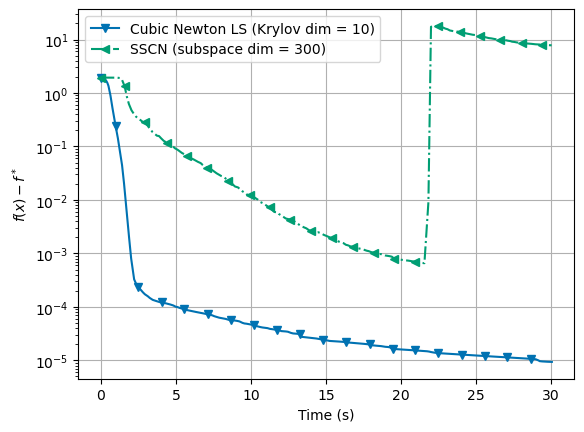

In [11]:
plt.style.use('seaborn-v0_8-colorblind')
# gd.trace.plot_losses(marker='^',time=True)
# cub_krylov5.trace.plot_losses(marker='o',time=True)
cub_krylov10.trace.plot_losses(marker='v',time=True)
# cub_krylov20.trace.plot_losses(marker='<',time=True)
# cub_krylov30.trace.plot_losses(marker='s',time=True)
# cub_krylov40.trace.plot_losses(marker='d',time=True)

# cub_krylov_bench.trace.plot_losses(marker='X',time=True)

# cub_root.trace.plot_losses(marker='*', label='cubic Newton (exact)')
# plt.xscale('log')
# print(cub.trace.loss_vals)
sscn300.trace.plot_losses(marker='<',time=True, linestyle='dashdot')


plt.xlabel('Time (s)')
plt.yscale('log')
plt.legend()
plt.grid()
plt.savefig('figs/varying_m_KSCN_{}.pdf'.format(dataset))
plt.show()


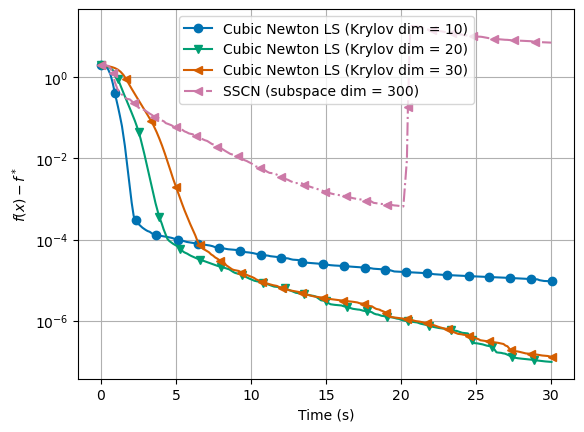

In [77]:
plt.style.use('seaborn-v0_8-colorblind')
# gd.trace.plot_losses(marker='^',time=True)
cub_krylov10.trace.plot_losses(marker='o',time=True)
cub_krylov20.trace.plot_losses(marker='v',time=True)
cub_krylov30.trace.plot_losses(marker='<',time=True)

# sscn10.trace.plot_losses(marker='o',time=True, linestyle='dashdot')
# sscn20.trace.plot_losses(marker='v',time=True, linestyle='dashdot')
# sscn30.trace.plot_losses(marker='<',time=True, linestyle='dashdot')

sscn300.trace.plot_losses(marker='<',time=True, linestyle='dashdot')

# cub_krylov_bench.trace.plot_losses(marker='X',time=True)

# cub_root.trace.plot_losses(marker='*', label='cubic Newton (exact)')
# plt.xscale('log')
# print(cub.trace.loss_vals)

plt.xlabel('Time (s)')
plt.yscale('log')
plt.legend()
plt.grid()
plt.savefig('figs/varying_m_SSCN_{}.pdf'.format(dataset))
plt.show()

In [ ]:
plt.style.use('seaborn-v0_8-colorblind')
# gd.trace.plot_losses(marker='^',time=True)
sscn10.trace.plot_losses(marker='o',time=True)
sscn20.trace.plot_losses(marker='v',time=True)
sscn30.trace.plot_losses(marker='<',time=True)

In [48]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [49]:
from optimizer.cubic import Optimizer, Lanczos, cubic_solver_root
from scipy.linalg import eigh

class Cubic_Krylov_LS_test(Optimizer):
    """
    Krylov subspace cubic Newton method with line search
    
    Arguments:
        
    """
    def __init__(self, reg_coef=None, subspace_dim=100, solver_eps=1e-8, beta=0.5, *args, **kwargs):
        super(Cubic_Krylov_LS_test, self).__init__(*args, **kwargs)    
        self.solver_it = 0
        self.subspace_dim = subspace_dim
        self.solver_eps = solver_eps

        self.beta = beta
        self.r0 = 0.1
        # self.residuals = []
        self.value = None

        if reg_coef is None:
            self.reg_coef = self.loss.hessian_lipschitz
        else:
            self.reg_coef = reg_coef
        
        # if cubic_solver == "GD": 
        #     self.cubic_solver = ls_cubic_solver
        # elif cubic_solver == "root":
        #     self.cubic_solver = cubic_solver_root
        # elif cubic_solver == "krylov":
        #     self.cubic_solver = cubic_solver_krylov
        # else:
        #     print("Error: cubic_solver not recognized")

        # if cubic_solver is None:
        #     # self.cubic_solver = ls_cubic_solver
        #     self.cubic_solver = cubic_solver_root
        self.spectra = []
        self.rho = []

    def step(self):
        
        if self.value is None:
            self.value = self.loss.value(self.x)
        
        
        self.grad = self.loss.gradient(self.x)


        self.hess = self.loss.hessian(self.x)
        h_eigs = eigh(self.hess, eigvals_only=True)
        self.spectra.append(h_eigs)

        # if self.cubic_solver is cubic_solver_krylov:    
        self.hess = lambda v: self.loss.hess_vec_prod(self.x,v)
            # krylov_start = time.time()
        V, alphas, betas, beta = Lanczos(self.hess, self.grad, m=self.subspace_dim)
            # krylov_end = time.time()
            # print('Krylov Time {time:.3f}'.format(time=krylov_end - krylov_start))
        self.hess = np.diag(alphas) + np.diag(betas, -1) + np.diag(betas, 1)

        np.append(betas,beta)
        self.rho.append(np.exp(np.log(betas).mean()))

        e1 = np.zeros(len(alphas))
        e1[0] = 1
        self.grad = np.linalg.norm(self.grad)*e1

        if np.linalg.norm(self.grad) < self.tolerance:
            return
        # set the initial value of the regularization coefficient
        reg_coef = self.reg_coef*self.beta

        # LS_start = time.time()

        s_new, solver_it, r0_new, model_decrease = cubic_solver_root(self.grad, self.hess, 
        reg_coef, epsilon = self.solver_eps, r0 = self.r0)
        x_new = self.x + V @ s_new
        value_new = self.loss.value(x_new)
        while value_new > self.value - model_decrease:
            reg_coef = reg_coef/self.beta
            s_new, solver_it, r0_new, model_decrease = cubic_solver_root(self.grad, self.hess, 
            reg_coef, epsilon = self.solver_eps, r0 = self.r0)
            x_new = self.x + V @ s_new
            value_new = self.loss.value(x_new)
        self.x = x_new
        self.reg_coef = reg_coef
        self.value = value_new
        self.r0 = r0_new
        
        self.solver_it += solver_it

        # if model_decrease < 1e-6:
        #     self.subspace_dim = 1
        # self.residuals.append(residual)
        # LS_end = time.time()
        # print('LS Time {time:.3f}'.format(time=LS_end - LS_start))
        
    def init_run(self, *args, **kwargs):
        super(Cubic_Krylov_LS_test, self).init_run(*args, **kwargs)
        self.trace.solver_its = [0]
        
    def update_trace(self):
        super(Cubic_Krylov_LS_test, self).update_trace()
        self.trace.solver_its.append(self.solver_it)

In [50]:
memory_size = 20
cub_krylov_test = Cubic_Krylov_LS_test(loss=loss, label='Cubic Newton LS (Krylov dim = {})'.format(memory_size),
                               subspace_dim=memory_size, tolerance = 1e-9)

In [51]:
print(f'Running optimizer: {cub_krylov_test.label}')
cub_krylov_test.run(x0=x0, it_max=100)
# cub_krylov.compute_loss_of_iterates()

Running optimizer: Cubic Newton LS (Krylov dim = 20)


100%|██████████| 100/100 [00:22<00:00,  4.53it/s]


In [52]:
spectra = np.array(cub_krylov_test.spectra)

In [53]:
spectra.shape

(100, 300)

In [54]:
rho = np.array(cub_krylov_test.rho)

In [55]:
rho

array([0.0012388 , 0.00194922, 0.00409076, 0.01104123, 0.01070371,
       0.00893749, 0.00573207, 0.00287255, 0.00189935, 0.00147776,
       0.00126364, 0.00107085, 0.00101252, 0.00095372, 0.00087278,
       0.00079097, 0.00072924, 0.00067594, 0.0006562 , 0.00062851,
       0.00063061, 0.000607  , 0.00058216, 0.00056745, 0.00054757,
       0.00057071, 0.00056531, 0.00057383, 0.00057267, 0.00057038,
       0.00057403, 0.00056753, 0.00055282, 0.0005602 , 0.00054936,
       0.00056113, 0.00056356, 0.00057376, 0.00057963, 0.00057793,
       0.00057842, 0.00057553, 0.00057133, 0.00054905, 0.00055252,
       0.00056703, 0.00056189, 0.00053723, 0.00056594, 0.00055156,
       0.00056311, 0.00055252, 0.00055184, 0.0005774 , 0.00057308,
       0.0005776 , 0.00057308, 0.00057695, 0.00057182, 0.0005667 ,
       0.00053654, 0.00054982, 0.00056352, 0.00056677, 0.00056407,
       0.00055754, 0.00056082, 0.00055358, 0.00056253, 0.00054027,
       0.00055059, 0.00053545, 0.00056447, 0.00056621, 0.00055

In [56]:
import matplotlib.pyplot as plt
for i in range(spectra.shape[1]):
    plt.plot(spectra[0:-1:10,i],'.')

# plt.figure()
# plt.semilogy(spectra[:,-memory_size], '.')
plt.xlabel('Iterations')
plt.plot(rho[0:-1:10],'k')
plt.show()

SyntaxError: invalid syntax (3409512666.py, line 8)

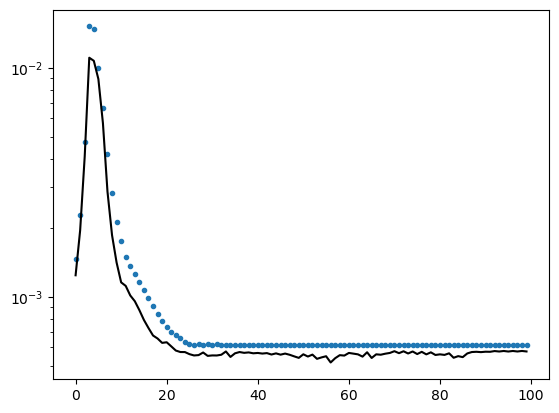

In [ ]:
import matplotlib.pyplot as plt
# for i in range(spectra.shape[1]):
# plt.plot(spectra[:,memory_size],'.')

plt.figure()
plt.semilogy(spectra[:,-memory_size], '.')
plt.plot(rho,'k')
plt.show()